In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from geopy.distance import geodesic
df=pd.read_csv("uber.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [34]:
print(df.isnull().sum())


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [35]:
df = df.dropna()



In [36]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df = df[df['fare_amount'] > 0]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

In [37]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [38]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 199268, dtype: bool

In [39]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [52]:

data = {
    'pickup_latitude': [40.7128, 34.0522, 37.7749],
    'pickup_longitude': [-74.0060, -118.2437, -122.4194],
    'dropoff_latitude': [34.0522, 36.7783, 34.0522],
    'dropoff_longitude': [-118.2437, -119.4179, -118.2437],
    'pickup_datetime': ['2024-10-01 14:30:00', '2024-10-01 15:30:00', '2024-10-01 16:30:00'],
    'passenger_count': [1, 2, 3],  
    'fare_amount': [15.0, 25.0, 30.0] 
}


df = pd.DataFrame(data)

# Convert 'pickup_datetime' to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Filter invalid latitudes and longitudes
df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_longitude'].between(-180, 180))
]

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

# Calculate the Haversine distance for each row
df['distance'] = df.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                                (row['dropoff_latitude'], row['dropoff_longitude'])).km, axis=1)

# Filter out rows with invalid or zero distance
df = df[df['distance'] > 0]

# Extract new time-related features
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

# Drop the columns that are no longer needed
df = df.drop(['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 
               'dropoff_latitude', 'dropoff_longitude'], axis=1)

# Check the final DataFrame
print(df)

# Now you can select your features and target
features = df[['distance', 'passenger_count', 'year', 'month', 'day', 'hour']]
target = df['fare_amount']


   passenger_count  fare_amount     distance  year  month  day  hour
0                1         15.0  3944.422231  2024     10    1    14
1                2         25.0   320.698548  2024     10    1    15
2                3         30.0   559.042337  2024     10    1    16


In [53]:

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [54]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 9.650264208819818
R²: 0.01855484300054988


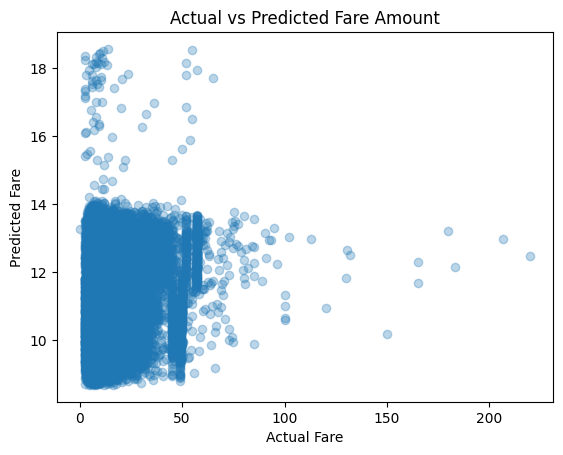

In [55]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare Amount')
plt.show()

In [57]:
# Assuming these are the features you used for training the model
# Make sure the order of columns matches exactly with the training data
new_trip = pd.DataFrame({
    'distance': [5.5],        # Example distance in kilometers
    'passenger_count': [2],
    'year': [2023],
    'month': [10],
    'day': [22],
    'hour': [14]
})

# Use the trained model to predict fare
predicted_fare = model.predict(new_trip)

print(f"Predicted Fare: ${predicted_fare[0]:.2f}")



Predicted Fare: $19.07
